In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
sizes = ['small','medium','large']
modes = ['right','left','straight']
variables = ['x','y','theta']
n_samples = 20
data = {}

for size in sizes:
    data[size] = {}
    for mode in modes:
        data[size][mode] = {variables[0]:[],variables[1]:[],variables[2]:[]}
        for i in range(n_samples):
            file_path = './'+str(size)+' '+str(mode)+'/'+str(i+1)+'.csv'
            temp_list = []
            
            with open(file_path, 'r') as csvFile:
                reader = csv.reader(csvFile)
                
                for row in reader:
                    temp_list.append(row)

            csvFile.close()
            
            for i,variable in enumerate(variables):
                temp_array = np.array(temp_list[1:], dtype=float)[:,i]
                data[size][mode][variable].append(np.mean(temp_array))
                
print('All saved in variable [data]')

All saved in variable [data]


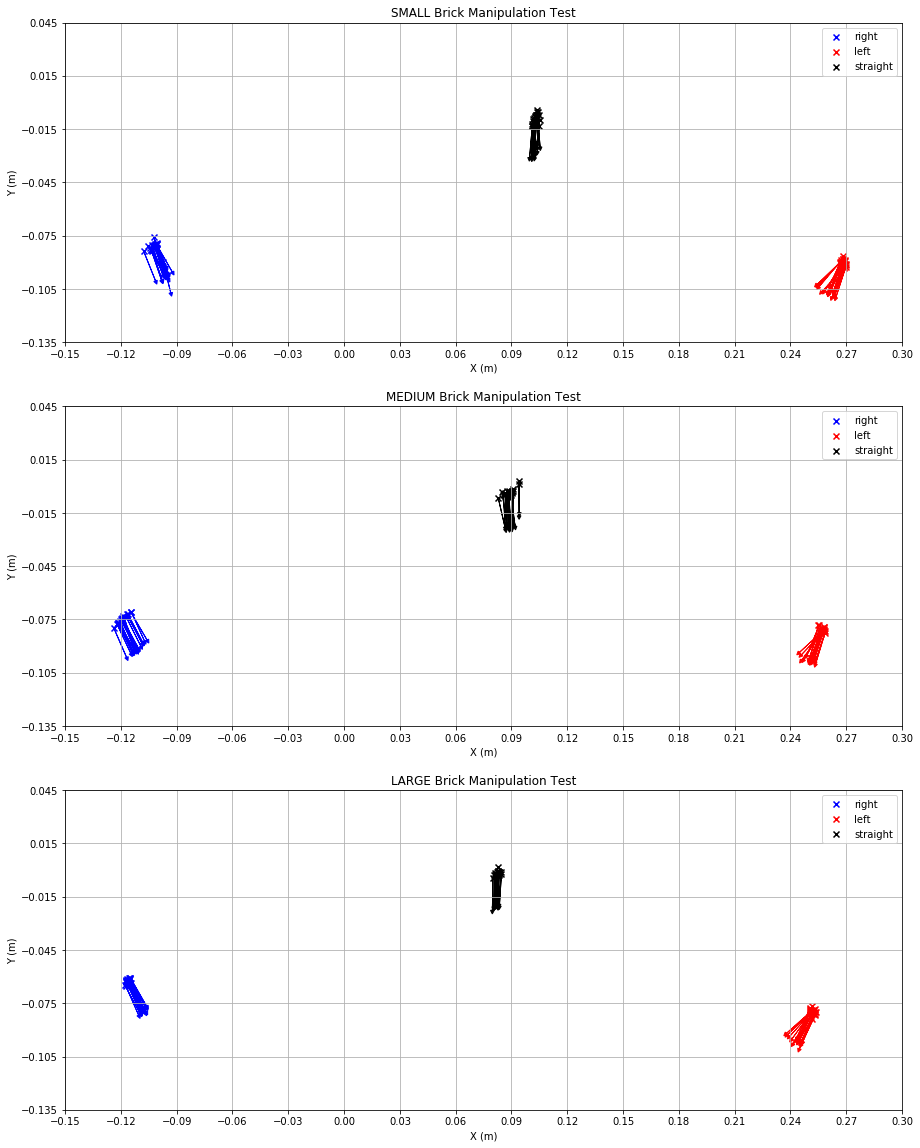

In [3]:
graph_scale = 0.5
arrow_scale = 0.02
plt.figure(figsize=(30*graph_scale,40*graph_scale))
colors = ['b','r','k']

for i,size in enumerate(sizes):
    plt.subplot(3,1,i+1)
    plt.title(size.upper()+' Brick Manipulation Test')
    plt.xlim(-0.15,0.3)
    plt.ylim(-0.135,0.045)
    plt.xticks(np.arange(-0.15,0.33,0.03))
    plt.yticks(np.arange(-0.135,0.046,0.03))

    for j,mode in enumerate(modes):
        plt.scatter(data[size][mode]['x'],data[size][mode]['y'],color=colors[j],marker='x',label=mode)

        for k in range(n_samples):
            plt.arrow(data[size][mode]['x'][k], data[size][mode]['y'][k], \
                      arrow_scale*np.cos(data[size][mode]['theta'][k]), \
                      arrow_scale*np.sin(data[size][mode]['theta'][k]), \
                      width=0.000001, color=colors[j], length_includes_head=True, \
                      head_width=0.002, head_length=0.002, overhang=0.0005)
    
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.legend()
    plt.grid()

plt.show()

In [4]:
def PCA(data):
    data_dev = data - np.average(data,0)
    data_cov = data_dev.T.dot(data_dev)
    eig_vals, eig_vecs = np.linalg.eigh(data_cov)
    return data_dev.dot(eig_vecs[:,-1::-1])

def detect_outlier(data, a, b):
    outliers, inliers = [], []
    for i in data:
        if (i[0]-b[0])**2/a[0]**2 + (i[1]-b[1])**2/a[1]**2 > 1:
            outliers.append(i)
        else:
            inliers.append(i)
    return np.array(outliers), np.array(inliers)

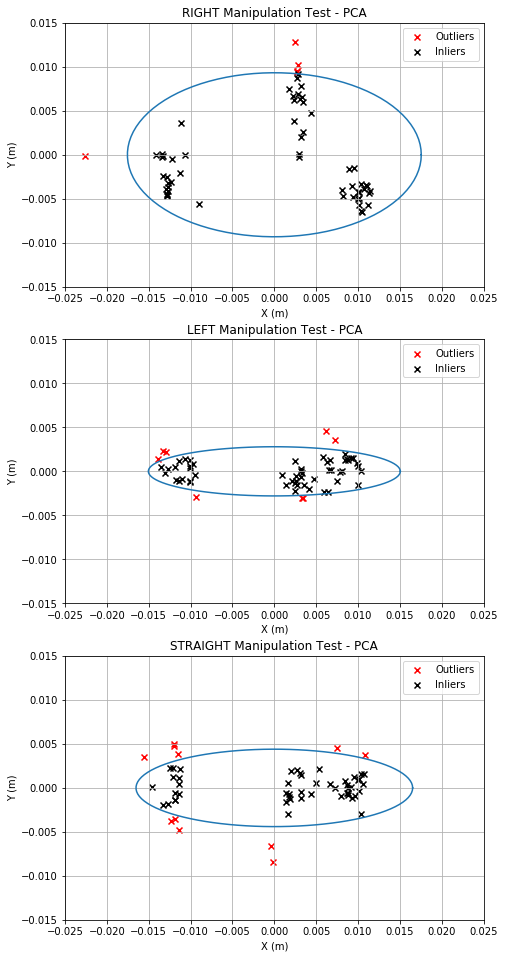

In [5]:
graph_scale = 1.5
parameter = 1.8
plt.figure(figsize=(5*graph_scale,11*graph_scale))
goals = [[-0.105,-0.082],[0.26,-0.086],[0.093,-0.013]]
precision, accuracy = [], []

for i,mode in enumerate(modes):
    plt.subplot(3,1,i+1)
    plt.title(mode.upper()+' Manipulation Test - PCA')

    data_xy = [[],[]]
    for size in sizes:
        data_xy[0].extend(data[size][mode]['x'])
        data_xy[1].extend(data[size][mode]['y'])

    pca_data = PCA(np.array(data_xy).T)
    a = parameter*np.std(pca_data,axis=0)
    b = np.mean(pca_data,axis=0)
    t = np.linspace(0, 2*np.pi, 100)
    
    plt.xlim(-0.025,0.025)
    plt.ylim(-0.015,0.015)
    plt.xticks(np.arange(-0.025,0.03,0.005))
    plt.yticks(np.arange(-0.015,0.017,0.005))
    plt.plot(b[0]+a[0]*np.cos(t), b[1]+a[1]*np.sin(t))

    outliers, inliers = detect_outlier(pca_data, a, b)
    if len(outliers) > 0:
        plt.scatter(outliers[:,0],outliers[:,1],color='r',marker='x',label='Outliers')
    
    plt.scatter(inliers[:,0],inliers[:,1],color='k',marker='x',label='Inliers')    
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.legend()
    plt.grid()

plt.show()


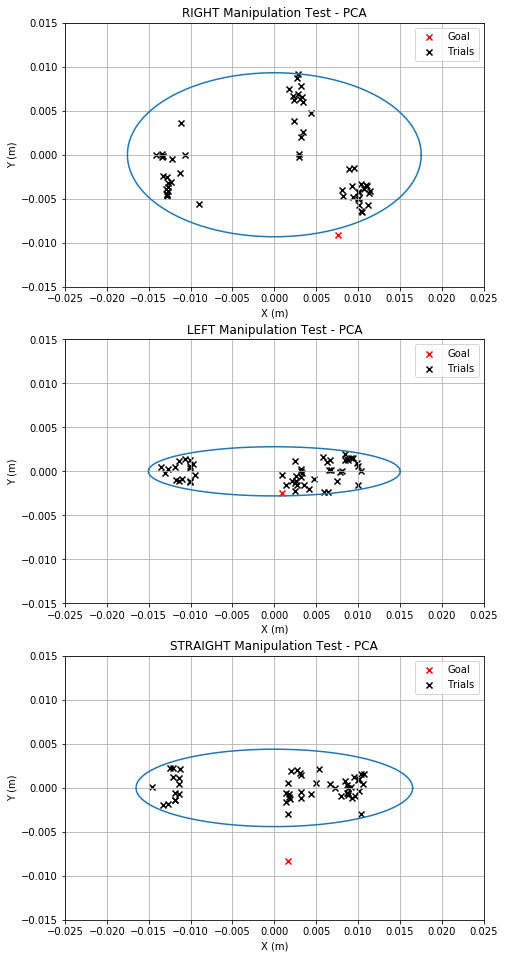

In [6]:
graph_scale = 1.5
parameter = 1.8
plt.figure(figsize=(5*graph_scale,11*graph_scale))
goals = [[-0.105,-0.082],[0.26,-0.086],[0.093,-0.013]]
precision, accuracy = [], []

for i,mode in enumerate(modes):
    plt.subplot(3,1,i+1)
    plt.title(mode.upper()+' Manipulation Test - PCA')

    data_xy = [[],[]]
    for size in sizes:
        data_xy[0].extend(data[size][mode]['x'])
        data_xy[1].extend(data[size][mode]['y'])

    data_xy = np.array(data_xy).T
    goal = goals[i] - np.average(data_xy,0)
    pca_data = PCA(data_xy)
    a = parameter*np.std(pca_data,axis=0)
    b = np.mean(pca_data,axis=0)
    t = np.linspace(0, 2*np.pi, 100)
    
    plt.xlim(-0.025,0.025)
    plt.ylim(-0.015,0.015)
    plt.xticks(np.arange(-0.025,0.03,0.005))
    plt.yticks(np.arange(-0.015,0.017,0.005))
    plt.plot(b[0]+a[0]*np.cos(t), b[1]+a[1]*np.sin(t))

    outliers, inliers = detect_outlier(pca_data, a, b)
    plt.scatter(*goal,color='r',marker='x',label='Goal')
    plt.scatter(inliers[:,0],inliers[:,1],color='k',marker='x',label='Trials')
    precision.append(np.linalg.norm(a))
    accuracy.append(np.average(np.linalg.norm(inliers - goal,axis=1)))
    
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.legend()
    plt.grid()

plt.show()

In [7]:
print('Straight Manipulation Test Precision: ', precision[2])
print('Left Manipulation Test Precision: ', precision[1])
print('Right Manipulation Test Precision: ', precision[0])
print('')
print('Straight Manipulation Test Accuracy: ', accuracy[2])
print('Left Manipulation Test Accuracy: ', accuracy[1])
print('Right Manipulation Test Accuracy: ', accuracy[0])

Straight Manipulation Test Precision:  0.017102278467817703
Left Manipulation Test Precision:  0.015310211782844146
Right Manipulation Test Precision:  0.019878653142453684

Straight Manipulation Test Accuracy:  0.011661763939026454
Left Manipulation Test Accuracy:  0.00756902457305089
Right Manipulation Test Accuracy:  0.01379082479493555


In [8]:
def get_chi_squared(mu,sigma,data,samples,N_bins):
    '''
    In order to use the in-build chisquare function, we need 2 inputs.
    ------
    f_obs: Observed frequencies, this comes from our histogram.
    f_exp: Expected frequencies, this comes from our gaussian distribution.
    ------
    '''
    ### computing f_exp for our samples ###
    f_exp = stats.norm.pdf(samples, mu, sigma)
    
    ### formatting frequencies and bins to use in loop ###
    freq, bins = np.histogram(data,bins=N_bins,density=1)
    freq = [0] + list(freq) + [0]
    bins = list(bins) + [samples.max()]
    
    ### computing f_obs for our samples ###
    f_obs = []
    for i, b in enumerate(bins):
        cond = (samples > b)
        samples = samples[np.where(cond)]
        f_obs += [freq[i]]*sum(~cond)
        
    ### computing chi-square value using f_obs and f_exp ###
    chi, p = stats.chisquare(f_obs, f_exp)
    
    return chi

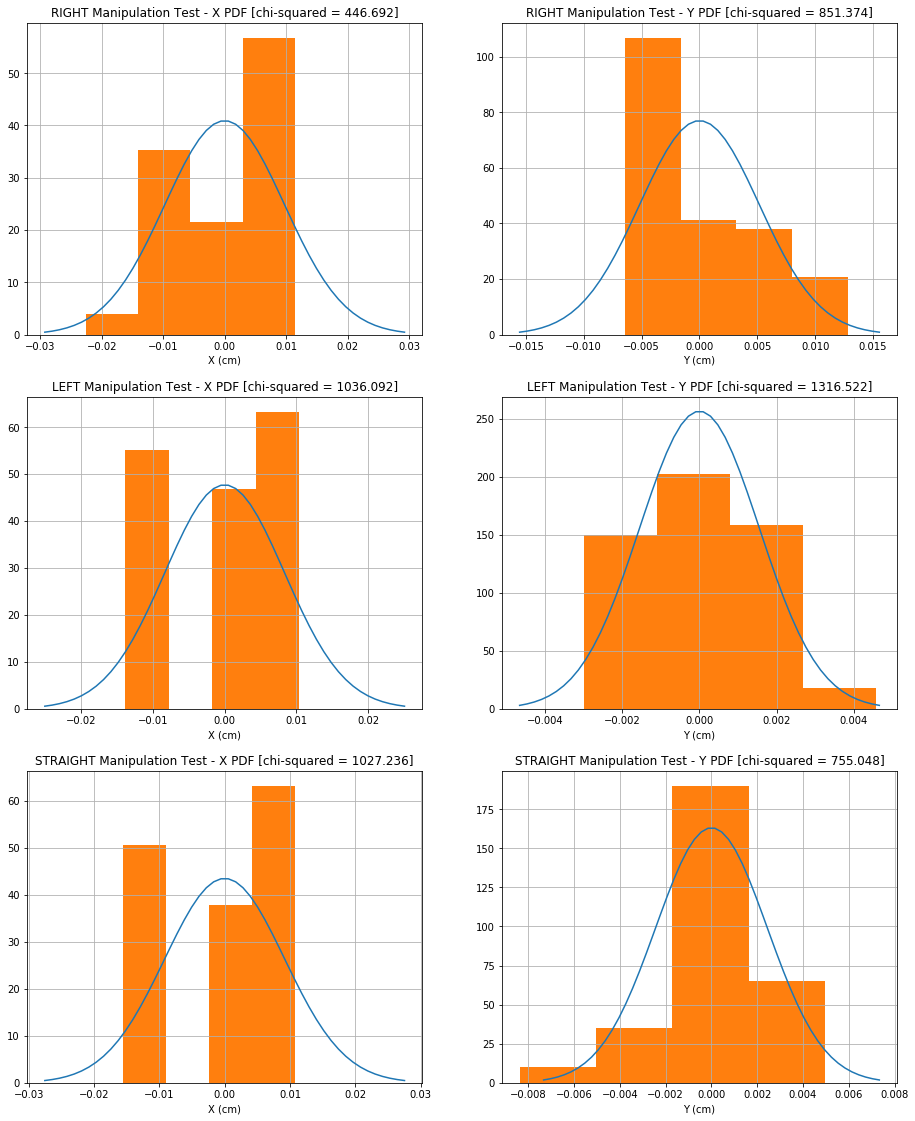

In [9]:
N_bins = 4
graph_scale = 1.3
N_samples = 50
plt.figure(figsize=(12*graph_scale,15*graph_scale))

for i,mode in enumerate(modes):
    data_xy = [[],[]]
    for size in sizes:
        data_xy[0].extend(data[size][mode]['x'])
        data_xy[1].extend(data[size][mode]['y'])

    data_xy = np.array(data_xy).T
    pca_data = PCA(data_xy)
    pca_data = np.sort(pca_data, axis=0)
    mu = np.mean(pca_data,axis=0)
    sigma = np.std(pca_data,axis=0)
    samples = np.linspace(mu-3*sigma, mu+3*sigma, N_samples)

    plt.subplot(3,2,i*2+1)
    chi = get_chi_squared(mu[0],sigma[0],pca_data[:,0],samples[:,0],N_bins)
    plt.title((mode.upper()+' Manipulation Test - X PDF [chi-squared = {0:.3f}]').format(chi))
    plt.plot(samples[:,0], stats.norm.pdf(samples[:,0], mu[0], sigma[0]))
    plt.hist(pca_data[:,0],bins=N_bins, density = 1)
    plt.xlabel('X (cm)')
    plt.grid()

    plt.subplot(3,2,i*2+2)
    chi = get_chi_squared(mu[1],sigma[1],pca_data[:,1],samples[:,1],N_bins)
    plt.title((mode.upper()+' Manipulation Test - Y PDF [chi-squared = {0:.3f}]').format(chi))
    plt.plot(samples[:,1], stats.norm.pdf(samples[:,1], mu[1], sigma[1]))
    plt.hist(pca_data[:,1],bins=N_bins, density = 1)
    plt.xlabel('Y (cm)')
    plt.grid()
    
plt.show()